Classification examples:

Is this email spam?                  no, yes

Is the transaction fraudulent?       no, yes

Is the tumor malignant?              no, yes

The type of classification problem where there are only two possible classes is called binary classification.

**Logistic Regression**

For a classification task, we can start by using our linear regression model,  𝑓𝐰,𝑏(𝐱(𝑖))=𝐰⋅𝐱(𝑖)+𝑏 , to predict  𝑦 given  𝑥.
However, we would like the predictions of our classification model to be between 0 and 1 since our output variable  𝑦
is either 0 or 1.
This can be accomplished by using a "sigmoid function" which maps all input values to values between 0 and 1.

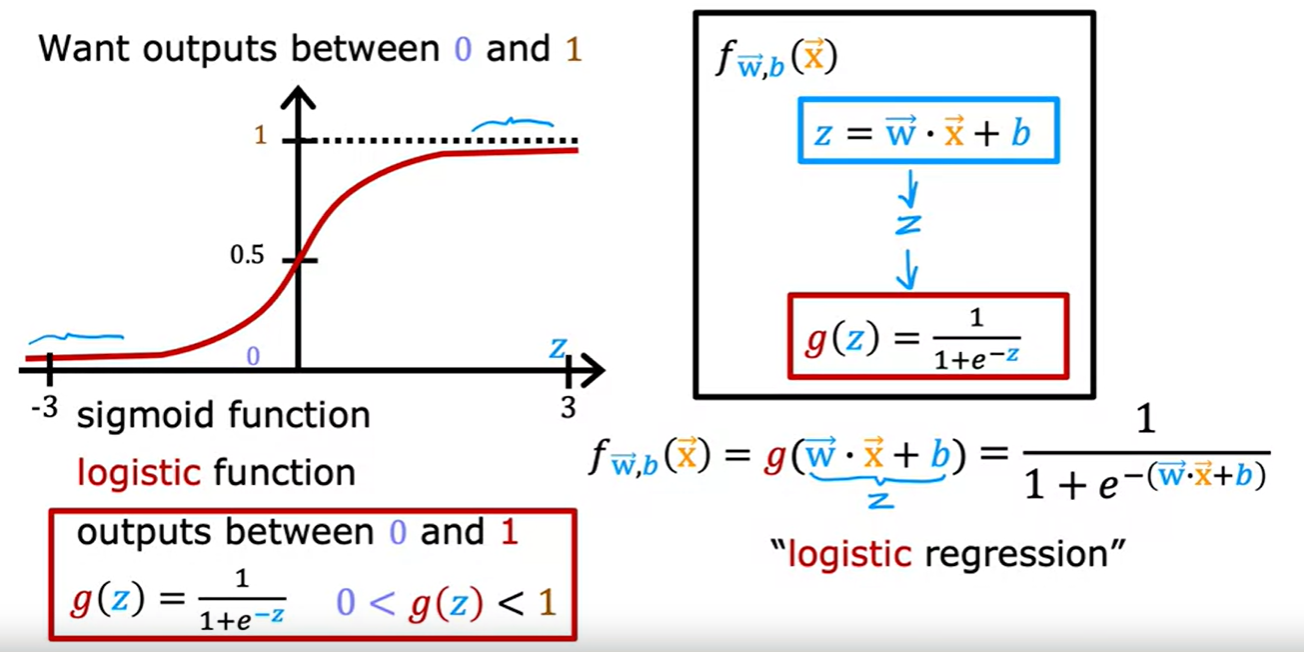

How to interpret the output of logistic regression.

Think of it as outputting the probability that the class or the label y will be equal to 1 given a certain input x. For example, in breast cancer classification, where x is the tumor size and y is either 0 or 1, if we have a patient come in and she has a tumor of a certain size x, and if based on this input x, the model results 0.7, then what that means is that the model is predicting or the model thinks there's a 70 percent chance that the true label y would be equal to 1 for this patient. In other words, the model is telling us that it thinks the patient has a 70 percent chance of the tumor turning out to be malignant.

We interpret the output of the model ( 𝑓𝐰,𝑏(𝑥)) as the probability that  𝑦=1 given  𝐱 and parameterized by  𝐰 and  𝑏.

Therefore, to get a final prediction ( 𝑦=0 or  𝑦=1) from the logistic regression model, we can use the following heuristic -

if  𝑓𝐰,𝑏(𝑥)>=0.5 , predict  𝑦=1
 
if  𝑓𝐰,𝑏(𝑥)<0.5, predict  𝑦=0

In [2]:
#NumPy has a function called exp(), which offers a convenient way to calculate the exponential (  𝑒^z ) of all elements 
#in the input array (z). It also works with a single number as an input. 

def sigmoid(z):
    """
    Compute the sigmoid of z

    Args:
        z (ndarray): A scalar, numpy array of any size.

    Returns:
        g (ndarray): sigmoid(z), with the same shape as z
         
    """

    g = 1/(1+np.exp(-z))
   
    return g

**Decision Boundary**

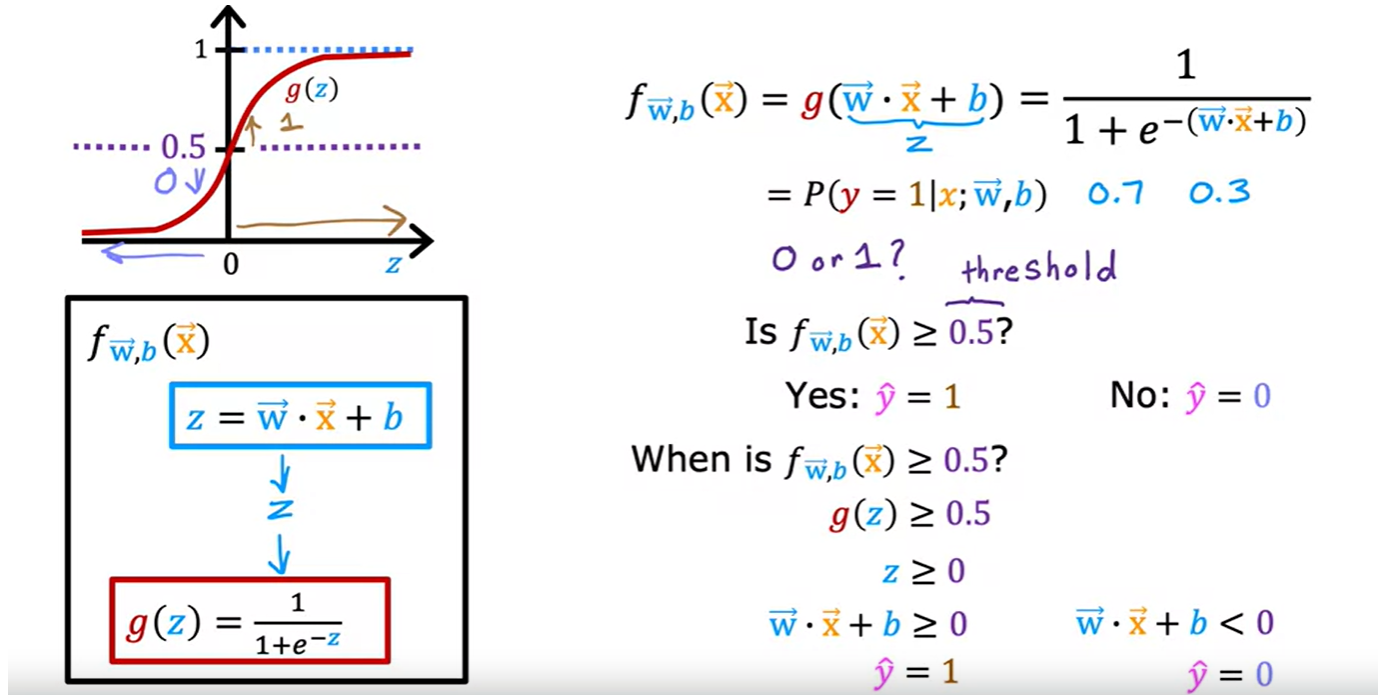


The decision boundary, correspond to when z is equal to 0. 

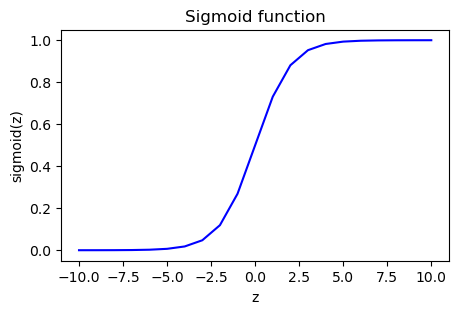

In [3]:
# Plot sigmoid(z) over a range of values from -10 to 10
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
z = np.arange(-10,11)

fig,ax = plt.subplots(1,1,figsize=(5,3))
# Plot z vs sigmoid(z)
ax.plot(z, sigmoid(z), c="b")

ax.set_title("Sigmoid function")
ax.set_ylabel('sigmoid(z)')
ax.set_xlabel('z')
plt.show()

**Cost Function for Logistic Regression**

Cost function gives a way to measure how well a specific set of parameters fits the training data. 

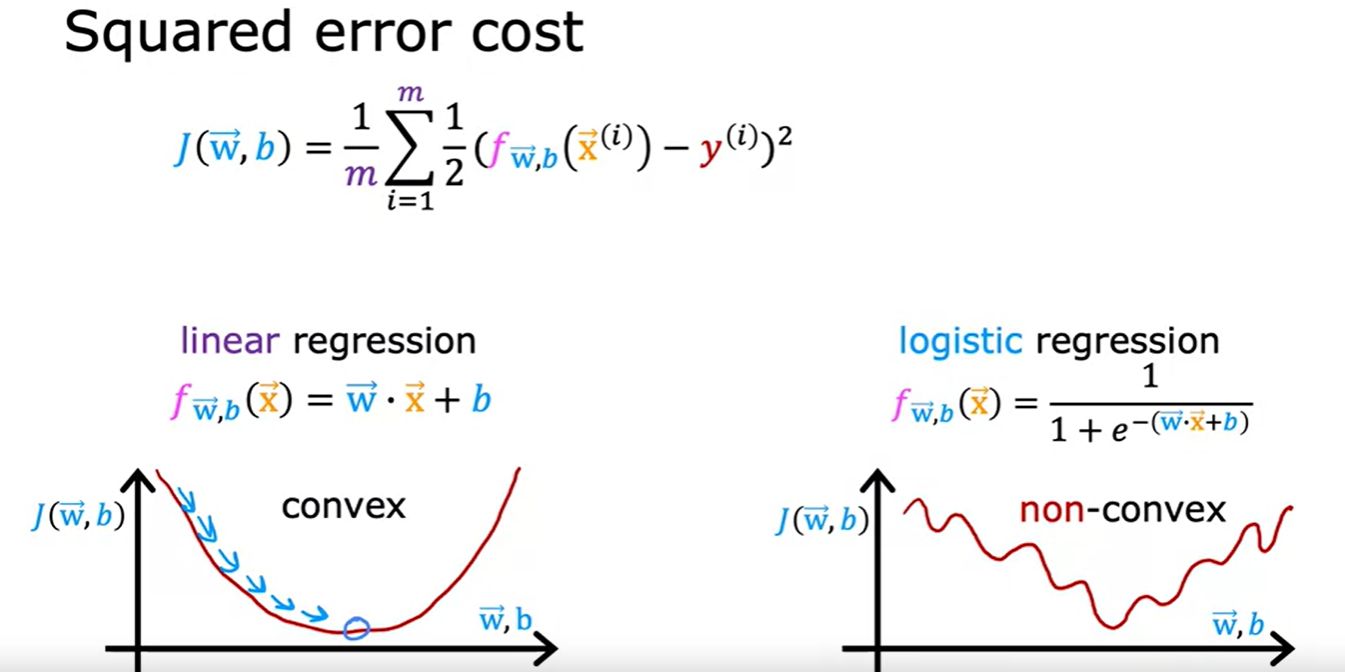

The cost function for linear regression is a convex function or a bowl shape. So wherever we start, it converges at the global minimum. Now if we use the same cost function for logistic regression, it becomes a non-convex function and we might get stuck in local minima. 

**if y=1**

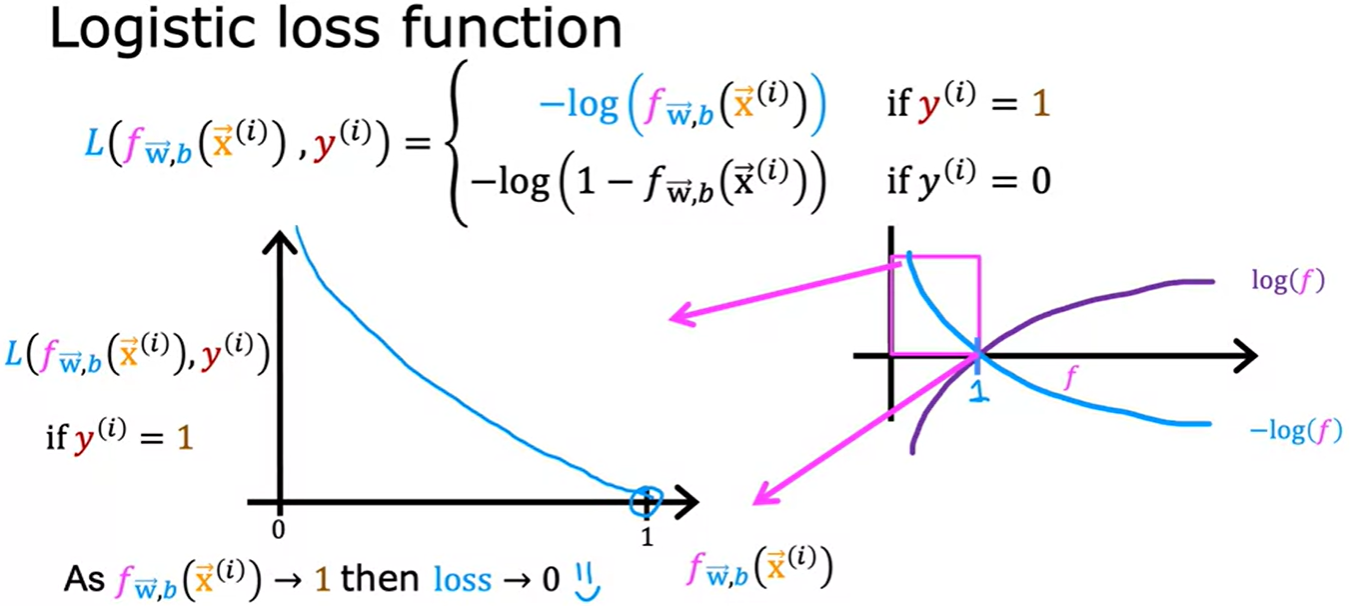



-log(f(x)):  When y is equal to 1, the loss function incentivizes or nurtures, or helps push the algorithm to make more accurate predictions because the loss is lowest, when it predicts values close to 1.

**if y=0**

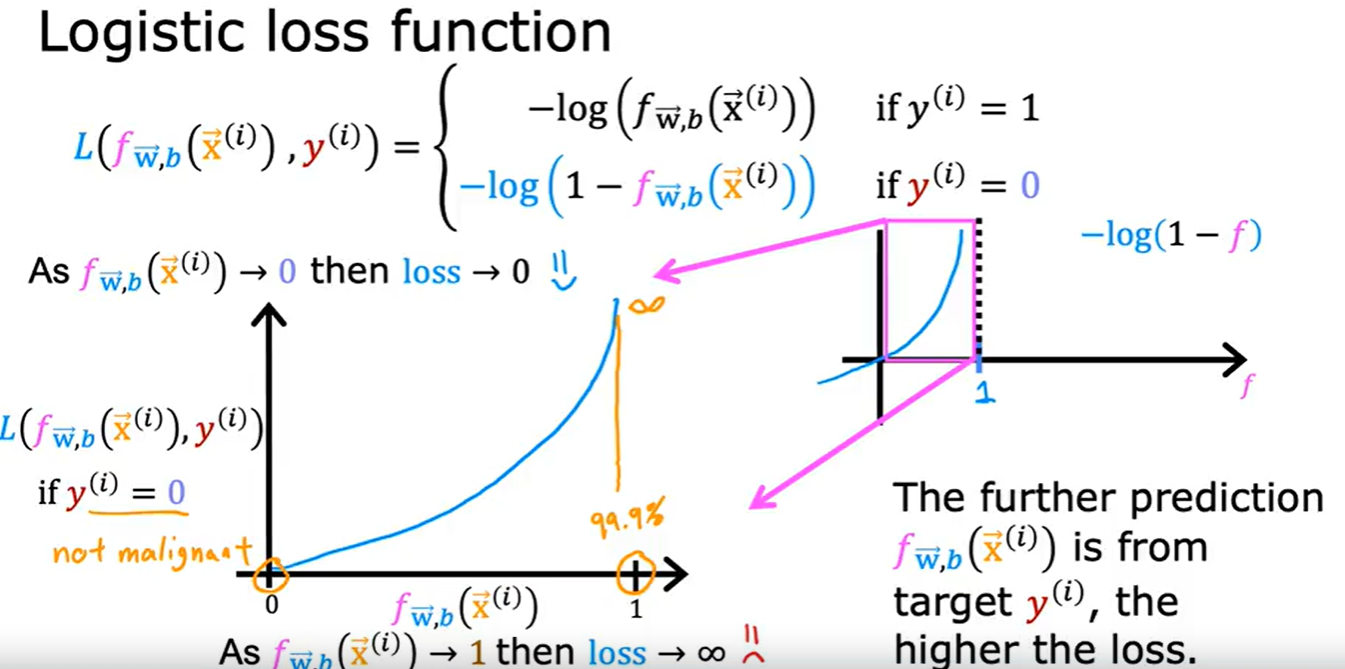

In [4]:
x_train = np.array([0., 1, 2, 3, 4, 5],dtype=np.longdouble)
y_train = np.array([0,  0, 0, 1, 1, 1],dtype=np.longdouble)


def gradient(x,  y, w, b):
    m=x.shape[0]
    dw=0
    db=0
    for i in range(m):
        z = sigmoid(np.dot(x[i],w)+b)
        dw_i=(y[i]-z)*x[i]
        db_i=(y[i]-z) 
        dw+=dw_i
        db+=db_i
        dw=dw/m
        db=db/m
    return dw, db


def cost_function(w, x, b, y):
    cost=0
    m=x.shape[0]
    for i in range(m):
        z = sigmoid(np.dot(x[i],w)+b)  #add sigmoid to normal sq error cost for linear regression
        cost = cost+(y[i]-z)**2
        cost = cost/(2*m)
    return cost

def gradient_descent(x, y, w_in, b_in, alpha, iterations, gradient,  cost_function ):
    w=w_in
    b=b_in
    
    w_history = []
    b_history = []
    for i in range(iterations):
        dw, db = gradient(x, y, w, b)
        w = w - alpha*(dw)
        b = b -alpha*(db)
        w_history.append(w)
        b_history.append(b)
    wx, by = np.meshgrid(w_history, b_history)   
    points = np.c_[wx.ravel(), by.ravel()]
    J_history = np.zeros(points.shape[0])

    for i in range(points.shape[0]):
        w,b = points[i]
        J_history[i] = cost_function(w, x, b, y)
    J_history = J_history.reshape(wx.shape)
    
    return J_history, w_history, b_history


In [11]:
# initialize parameters
w_init = 0
b_init = 0
# some gradient descent settings
iterations = 1000
tmp_alpha = 1.0e-2
# run gradient descent
J_hist, w_hist, b_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha, 
                                                    iterations, gradient, cost_function)

Text(0.5, 0.92, '"Logistic" Squared Error Cost vs (w, b)')

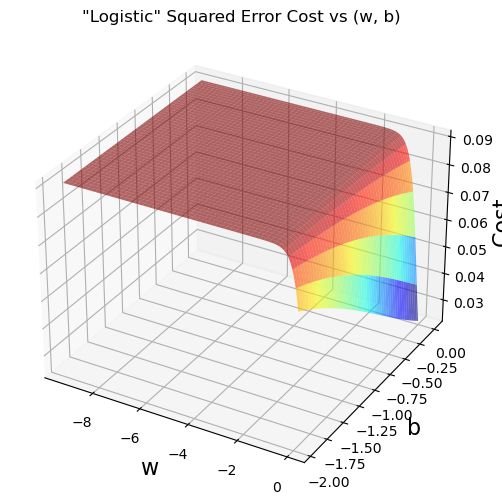

In [12]:
#plot squared error cost function for logistic regression
from matplotlib import cm
w, b=np.meshgrid(w_hist, b_hist)
fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(w, b, J_hist, alpha=0.6, cmap=cm.jet)

ax.set_xlabel('w', fontsize=16)
ax.set_ylabel('b', fontsize=16)
ax.set_zlabel("Cost", rotation=90, fontsize=16)
ax.set_title('"Logistic" Squared Error Cost vs (w, b)')


**Single global minimum**

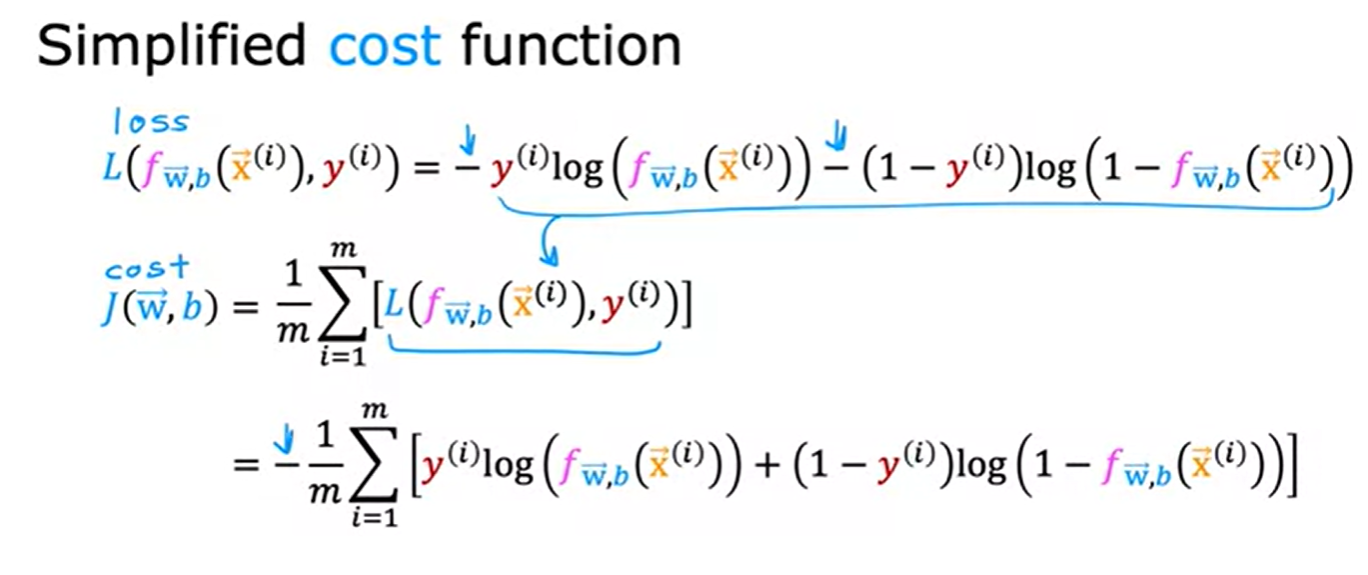


In [13]:
def compute_cost(X, y, w, b):
    """
    Computes cost

    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      cost (scalar): cost
    """

    m = X.shape[0]
    cost = 0.0
    for i in range(m):
        z_i = np.dot(X[i],w) + b
        f_wb_i = sigmoid(z_i)
        cost +=  -y[i]*np.log(f_wb_i) - (1-y[i])*np.log(1-f_wb_i)
             
    cost = cost / m
    return cost



**Gradient descent for logistic regression**

![image.png](attachment:image.png)

High Bias: If the algorithm has underfit the data, meaning that it's just not even able to fit the training set that well. 

Generalization: When algorithm make good predictions even on brand new examples that it has never seen before. 

High variance: Fits the training set very well, it has fit the data almost too well, hence is overfit. It does not look like this model will generalize to new examples that's never seen before

![image-3.png](attachment:image-3.png)

To address overfitting:

    1. Collect more training data
    2. Select a subset of the more relevant features. Disadvantage of this method is that we might be removing useful 
    features.
    3. Apply regularization, it is a way to gently reduce the impacts of some of the features without doing something as 
    harsh as eliminating it outright. By convention, we normally just reduce the size of the wj parameters, that is w1 
    through wn. It doesn't make a huge difference whether we regularize the parameter b as well or not. 
 

![image-4.png](attachment:image-4.png)

![image-5.png](attachment:image-5.png)

In [ ]:
def compute_cost_reg(X, y, w, b, lambda_ = 1):
    """
    Computes the cost over all examples
    Args:
      X : (ndarray Shape (m,n)) data, m examples by n features
      y : (ndarray Shape (m,))  target value 
      w : (ndarray Shape (n,))  values of parameters of the model      
      b : (scalar)              value of bias parameter of the model
      lambda_ : (scalar, float) Controls amount of regularization
    Returns:
      total_cost : (scalar)     cost 
    """

    m, n = X.shape
    
    # Calls the compute_cost function that you implemented above
    cost_without_reg = compute_cost(X, y, w, b) 
    
    reg_cost = 0.
    
    for j in range(n):
        cost = (lambda_/(2*m))*((w[j])**2)
        reg_cost += cost
    
    
    # Add the regularization cost to get the total cost
    total_cost = cost_without_reg + reg_cost

    return total_cost

In [14]:
def compute_gradient_reg(X, y, w, b, lambda_ = 1): 
    """
    Computes the gradient for logistic regression with regularization
 
    Args:
      X : (ndarray Shape (m,n)) data, m examples by n features
      y : (ndarray Shape (m,))  target value 
      w : (ndarray Shape (n,))  values of parameters of the model      
      b : (scalar)              value of bias parameter of the model
      lambda_ : (scalar,float)  regularization constant
    Returns
      dj_db : (scalar)             The gradient of the cost w.r.t. the parameter b. 
      dj_dw : (ndarray Shape (n,)) The gradient of the cost w.r.t. the parameters w. 

    """
    m, n = X.shape
    
    dj_db, dj_dw = compute_gradient(X, y, w, b)
  
    for j in range(n):
        dj_dw[j] = dj_dw[j] + (lambda_/m)*w[j]   
        
    return dj_db, dj_dw